Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [22]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
import numpy as np
from renamevars_function import renamevars
import matplotlib.pyplot as plt


In [3]:
from scat_plt_function import scat_plt
from normalize_function import normalize
import pandas as pd

In [4]:
from scat_plt_function import scat_plt
from group_and_average_function import group_and_average

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [7]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### 1. Cleaning and tidying the dataset - Collaborator 1: Isabel

In [8]:
# your code here

In [17]:
# In order to know column names and to iterate 
col_name = df.columns
col_name

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [18]:
df['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: category
Categories (2, object): ['0', '1']

##### Use simple names of the variables for the rest of the analysis

In [19]:
 dict_names = {col_name[1]:"Fo(Hz)", col_name[2]:"Fhi(Hz)", col_name[3]:"Flo(Hz)",col_name[4]:"Jitter(%)",
             col_name[5]:"Jitter(Abs)",col_name[6]:"RAP",col_name[7]:"PPQ",col_name[8]:"DDP",col_name[9]:"Shimmer",
             col_name[10]:"Shimmer(dB)", col_name[11]:"APQ3",col_name[12]:"APQ5",col_name[13]:"APQ",col_name[14]:"DDA"}


# We use the function that we have created in an other notebook. The resulting df is shown below
df_renamed = renamevars(df,dict_names)

##### Summarize the data after cleaning (that is, after removing some correlations) when the data is read

In [20]:
# See correlation values so to clean up data and have less variables. If correlation of two variable is close to 1, 
# we consider that the information given by these two variables is similar respect to the other ones. 

df_renamed.corr()

ValueError: could not convert string to float: 'phon_R01_S01_1'

So in order to feed the model with relevant and non redundant information, the correlation equal to 0.8 was chosen as a threshold. This is because with this correlation value two variables should fall into a straight line. Therefore, we are going to stay only with one variable if two have correlations greater than 0.8.

In [21]:
correlation_matrix = df_renamed.corr()

# Finding variables with correlations greater than 0.8
highly_correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_vars.add(colname)

# Filter the DataFrame
df_cleaned = df_renamed.drop(columns=highly_correlated_vars)

ValueError: could not convert string to float: 'phon_R01_S01_1'

In [ ]:
highly_correlated_vars

{'APQ',
 'APQ3',
 'APQ5',
 'DDA',
 'DDP',
 'Jitter(Abs)',
 'NHR',
 'PPE',
 'PPQ',
 'RAP',
 'Shimmer(dB)'}

In [ ]:
df_cleaned

,name,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.04087,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.02751,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.02308,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.02296,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608


We have 195 observations, as it is shown above. And we finally end up with 12 features (columns).

Now we want to see if there are apparent differences between controls and patients. So we can inspect the mean of the variables Fo(Hz), Shimmer and DFA; among others in order to see if they are the same. 

In [23]:
 # Differences between patients(1) and control(0):
df_patients = df_cleaned[df_cleaned['status'] == "1"]
df_control = df_cleaned[df_cleaned['status'] == "0"]

NameError: name 'df_cleaned' is not defined

In [ ]:
print("Mean fundamental frequency, patients:", np.mean(df_patients["Fo(Hz)"]))
print("Mean fundamental frequency, control:",np.mean(df_control["Fo(Hz)"]))

Mean fundamental frequency, patients: 145.1807619047619
Mean fundamental frequency, control: 181.9377708333333


In [ ]:
print("Mean Shimmer, patients:", np.mean(df_patients["Shimmer"]))
print("Mean Shimmer, control:",np.mean(df_control["Shimmer"]))

Mean Shimmer, patients: 0.03365816326530613
Mean Shimmer, control: 0.01761520833333333


In [ ]:
print("Mean DFA, patients:", np.mean(df_patients["DFA"]))
print("Mean DFA, control:",np.mean(df_control["DFA"]))

Mean DFA, patients: 0.7254079387755102
Mean DFA, control: 0.6957155625000001


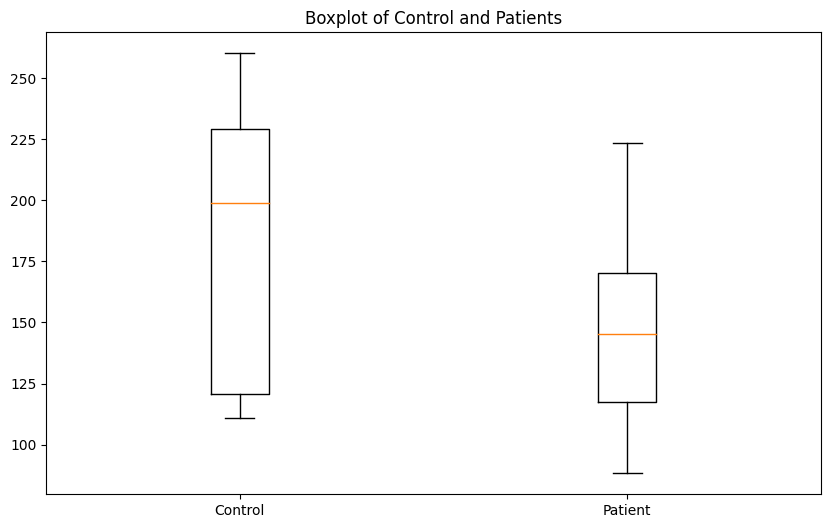

In [ ]:
# Visualization of variables and outliers
plt.figure(figsize=(10, 6))
plt.boxplot([df_control['Fo(Hz)'], df_patients['Fo(Hz)']], labels=['Control', 'Patient'])
plt.title('Boxplot of Control and Patients')
plt.show()

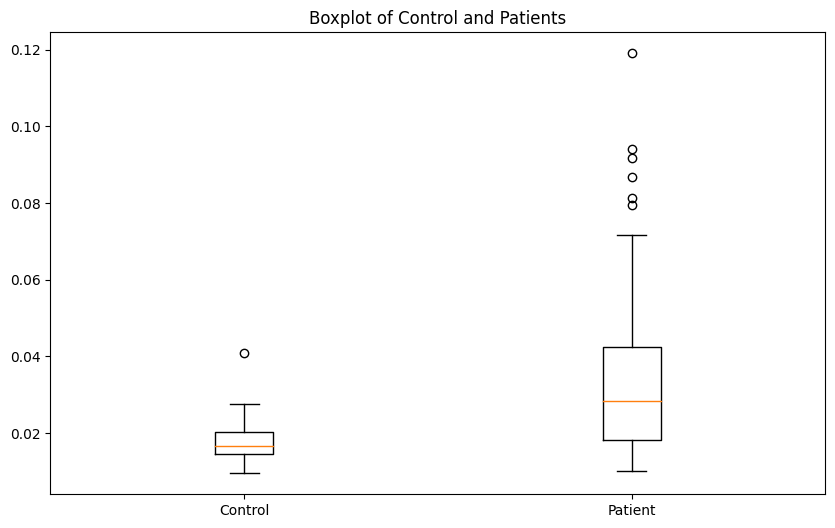

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_control['Shimmer'], df_patients['Shimmer']], labels=['Control', 'Patient'])
plt.title('Boxplot of Control and Patients')
plt.show()

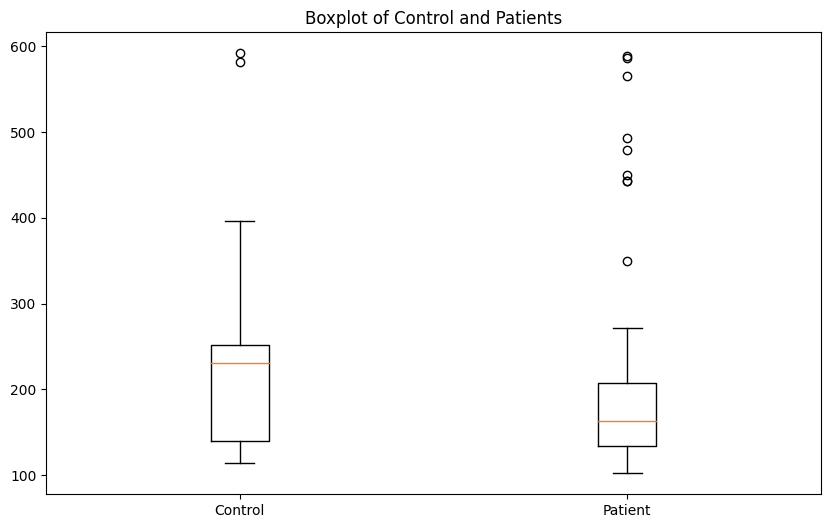

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_control['Fhi(Hz)'], df_patients['Fhi(Hz)']], labels=['Control', 'Patient'])
plt.title('Boxplot of Control and Patients')
plt.show()

We can see that some variables have outliers as the 'Shimmer' one and the Fhi(Hz). 

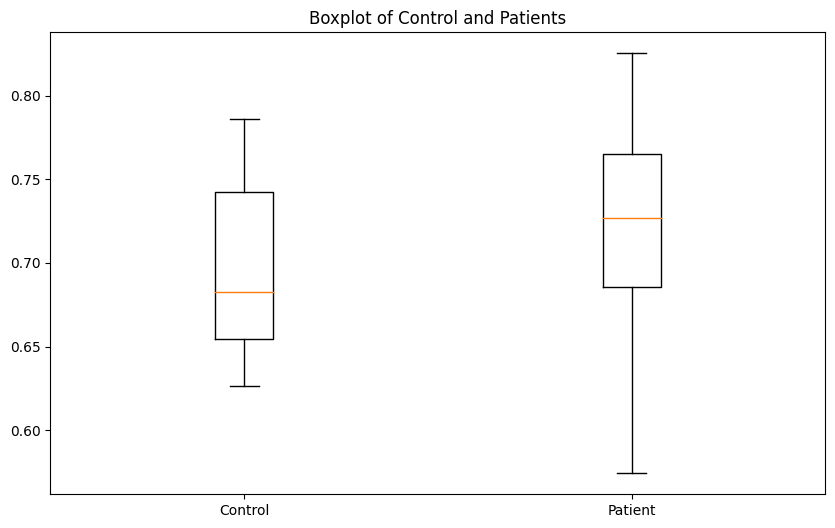

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_control['DFA'], df_patients['DFA']], labels=['Control', 'Patient'])
plt.title('Boxplot of Control and Patients')
plt.show()

As we can see, some variables have outliers; for example Shimmer and Fhi(Hz). We will remove the outliers from our point of view because they are not representative of the general data so conclusions reach by looking at them may be incorrect. It is more of interest to look for the data which has less variabililty between it. 

### 2. Basic EDA based on plots and descriptive statistics

Axes(0.125,0.11;0.775x0.77)


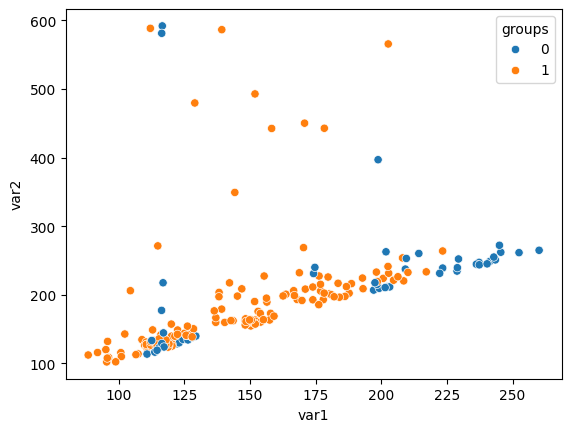

In [24]:
# your code here

# checking correlations between variables related to fundamental frequency 
print(scat_plt(df['MDVP:Fo(Hz)'], df['MDVP:Fhi(Hz)'], df['status']))

# droping columns: MDVP:Flo(Hz)

Axes(0.125,0.11;0.775x0.77)


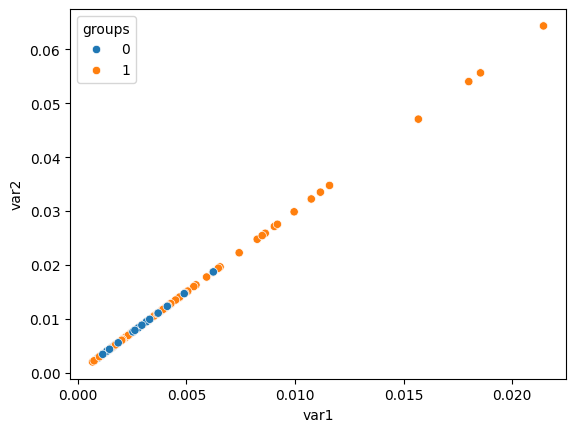

In [25]:
# checking correlations between variables related to Jitter
print(scat_plt(df['MDVP:RAP'], df['Jitter:DDP'], df['status']))

# droping columns: MDVP:Jitter(Abs) and MDVP:PPQ

Axes(0.125,0.11;0.775x0.77)


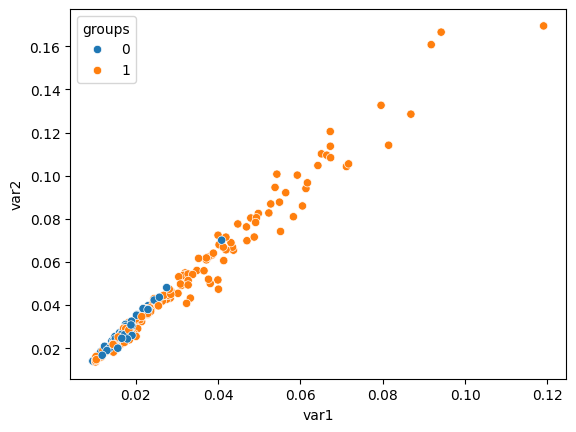

In [26]:
# checking correlations between variables related to Shimmer
print(scat_plt(df['MDVP:Shimmer'], df['Shimmer:DDA'], df['status']))

# droping columns: MDVP:Shimmer(dB), MDVP:APQ, Shimmer:APQ3, Shimmer:APQ5

##### Create a dataframe for aggregating each variables across trials. 

In [27]:
# Restructure the column "name" into two new columns called subject_id and trial
new_cols = df_cleaned["name"].str.split('_', expand=True) 
new_cols.drop(new_cols.columns[[0, 1]], axis = 'columns', inplace = True)
new_cols.columns = ['subject_id', 'trial']
df_cleaned.drop("name", axis = 'columns', inplace = True)
df_cleaned[['subject_id', 'trial']] = new_cols[['subject_id', 'trial']]

NameError: name 'df_cleaned' is not defined

In [ ]:
df_avg = group_and_average(df_cleaned,"subject_id")
df_avg

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
subject_id,,,,,,,,,,,
S01,118.719333,141.312833,106.029833,0.010085,0.053932,20.406667,0.428488,0.821314,-4.239926,0.296836,2.342642
S02,99.770333,121.894333,95.413167,0.004585,0.021668,22.997333,0.598429,0.778017,-5.420414,0.308289,2.287428
S04,147.346167,216.867500,87.532333,0.004347,0.019343,23.899667,0.521660,0.645843,-5.337281,0.249288,2.360638
S05,159.837667,181.630167,86.767167,0.006247,0.043337,19.058667,0.626723,0.695886,-4.560947,0.278483,2.787869
S06,150.644667,208.264333,78.278333,0.005230,0.021367,24.762000,0.432724,0.719675,-6.223537,0.228296,2.440360
S07,200.266833,210.884333,194.366167,0.002163,0.010803,30.992167,0.395578,0.741482,-7.589537,0.173049,1.795701
S08,182.032500,196.059833,170.768167,0.003227,0.016737,25.748333,0.355864,0.768637,-6.384376,0.193017,2.400193
S10,243.814333,254.280500,222.115000,0.002390,0.015308,24.614667,0.451700,0.638251,-7.105562,0.129853,2.298465
S13,125.546333,134.313167,116.898833,0.004595,0.020510,24.736500,0.509845,0.762657,-6.695058,0.261352,2.100401


### 3. Aggregating and transforming variables in the dataset

In [28]:
# create the cleaned_df by removing selected variables
cleaned_df = df.drop(columns = ['MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'MDVP:APQ', 'Shimmer:APQ3', 'Shimmer:APQ5'])
cleaned_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:RAP,Jitter:DDP,MDVP:Shimmer,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,0.00784,0.00370,0.01109,0.04374,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,0.00968,0.00465,0.01394,0.06134,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,0.01050,0.00544,0.01633,0.05233,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,0.00997,0.00502,0.01505,0.05492,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,0.01284,0.00655,0.01966,0.06425,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [29]:
# test
av_df = group_and_average(cleaned_df,'status')
print(av_df)
len(av_df)
list(av_df.columns.values)

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Jitter(%)  MDVP:RAP  Jitter:DDP  \
status                                                                    
0        181.937771    223.636750        0.003866  0.001925    0.005776   
1        145.180762    188.441463        0.006989  0.003757    0.011273   

        MDVP:Shimmer  Shimmer:DDA       NHR        HNR      RPDE       DFA  \
status                                                                       
0           0.017615     0.028511  0.011483  24.678750  0.442552  0.695716   
1           0.033658     0.053027  0.029211  20.974048  0.516816  0.725408   

         spread1   spread2        D2       PPE  
status                                          
0      -6.759264  0.160292  2.154491  0.123017  
1      -5.333420  0.248133  2.456058  0.233828  


group_and_average_function.ipynb:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "execution_count": 1,


['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

### 4. Differentiating between controls (healthy subjects) and patients

In [30]:
av_df.index.name = 'status'
av_df.reset_index(inplace=True)
print(av_df)

  status  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Jitter(%)  MDVP:RAP  Jitter:DDP  \
0      0   181.937771    223.636750        0.003866  0.001925    0.005776   
1      1   145.180762    188.441463        0.006989  0.003757    0.011273   

   MDVP:Shimmer  Shimmer:DDA       NHR        HNR      RPDE       DFA  \
0      0.017615     0.028511  0.011483  24.678750  0.442552  0.695716   
1      0.033658     0.053027  0.029211  20.974048  0.516816  0.725408   

    spread1   spread2        D2       PPE  
0 -6.759264  0.160292  2.154491  0.123017  
1 -5.333420  0.248133  2.456058  0.233828  


In [31]:
# First scenario: cleaned + aggregated data 
y = cleaned_df['status']
x = cleaned_df.drop(['status', 'name'], axis = 1) # drop all variables that are not predicting variables
# Initialize model with n = 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model on the observed data.
knn.fit(x, y)
# See how model performs. 
Acc = knn.score(x, y)
print('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.9076923076923077


In [39]:
# Second scenario: cleaned + aggregated data + zscore normalized data
y = cleaned_df['status']
x = cleaned_df.drop(['status', 'name'], axis = 1) # drop all variables that are not predicting variables
x = normalize(x, 0) ## z-score normalization
# Initialize model with n = 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model on the observed data.
knn.fit(x, y)
# See how model performs. 
Acc = knn.score(x, y)
print('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.9794871794871794


In [40]:
# Third scenario: cleaned + aggregated data + min-max normalized data
y = cleaned_df['status']
x = cleaned_df.drop(['status', 'name'], axis = 1) # drop all variables that are not predicting variables
x = normalize(x, 1) ## min max normalization
# Initialize model with n = 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model on the observed data.
knn.fit(x, y)
# See how model performs. 
Acc = knn.score(x, y)
print('The accuracy of the model is ' + str(Acc))

The accuracy of the model is 0.9846153846153847


Of the three models compared, the model that uses the cleaned and aggregated data and normalized using the min-max option turns out to be the best one with an accuracy of 0.9846153846153847.